<a href="https://colab.research.google.com/github/ARIVUCHUDAR27/CODSOFT/blob/main/Movie_Genere_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import torch
from torch.utils.data import DataLoader, Dataset
import time
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [4]:
train_label=[]
train_description=[]
with open("train_data.txt",'r',encoding='utf-8') as f:
  for line in f:
    text=line.split(':::')
    train_label.append(text[2])
    train_description.append(text[3])


In [5]:
test_description=[]
with open("test_data.txt",'r',encoding='utf-8') as f:
  for line in f:
    text=line.split(':::')
    test_description.append(text[2])

In [6]:
test_label=[]
with open("test_data_solution.txt",'r',encoding='utf-8') as f:
  for line in f:
    text=line.split(':::')
    test_label.append(text[2])

In [7]:
print("Training data")
print(len(train_label))
print(len(train_description))

print("Testing data")
print(len(test_description))
print(len(test_label))

print(set(train_label))

Training data
54214
54214
Testing data
54200
54200
{' biography ', ' family ', ' talk-show ', ' horror ', ' musical ', ' sci-fi ', ' short ', ' crime ', ' mystery ', ' news ', ' adventure ', ' fantasy ', ' documentary ', ' game-show ', ' reality-tv ', ' thriller ', ' animation ', ' adult ', ' drama ', ' war ', ' sport ', ' romance ', ' history ', ' action ', ' western ', ' comedy ', ' music '}


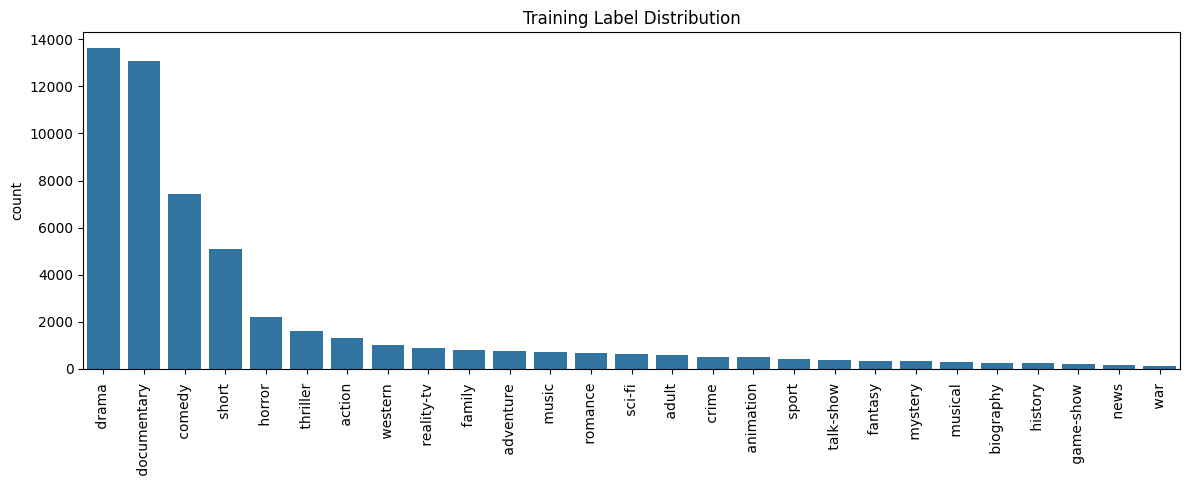

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x=train_label, order=pd.Series(train_label).value_counts().index)
plt.xticks(rotation=90)
plt.title("Training Label Distribution")
plt.tight_layout()
plt.show()

In [9]:
train_lengths = [len(desc.split()) for desc in train_description]
test_lengths = [len(desc.split()) for desc in test_description]

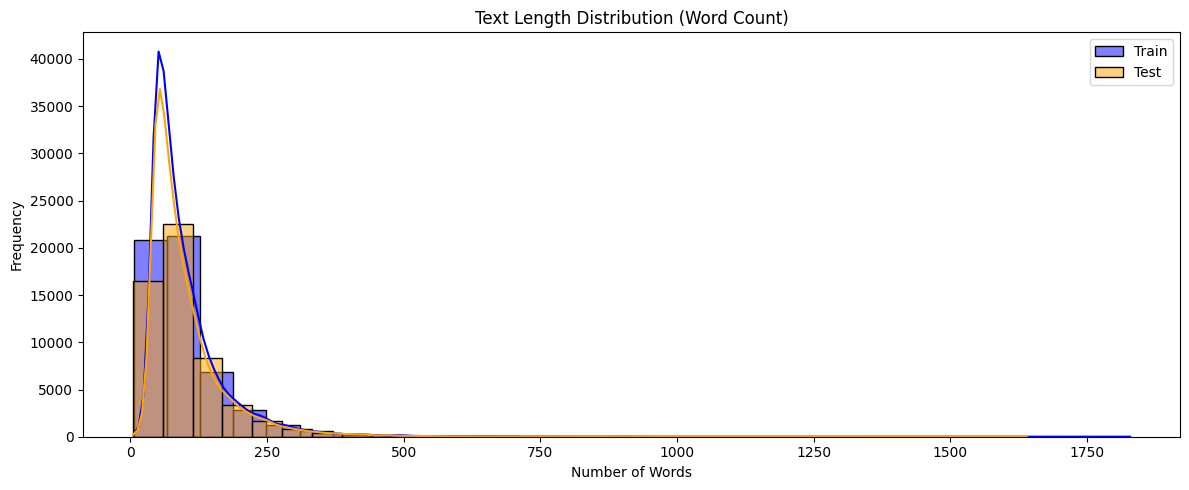

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(train_lengths, bins=30, kde=True, color='blue', label='Train')
sns.histplot(test_lengths, bins=30, kde=True, color='orange', label='Test')
plt.legend()
plt.title("Text Length Distribution (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
train_all_text = ' '.join(train_description)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(train_all_text)


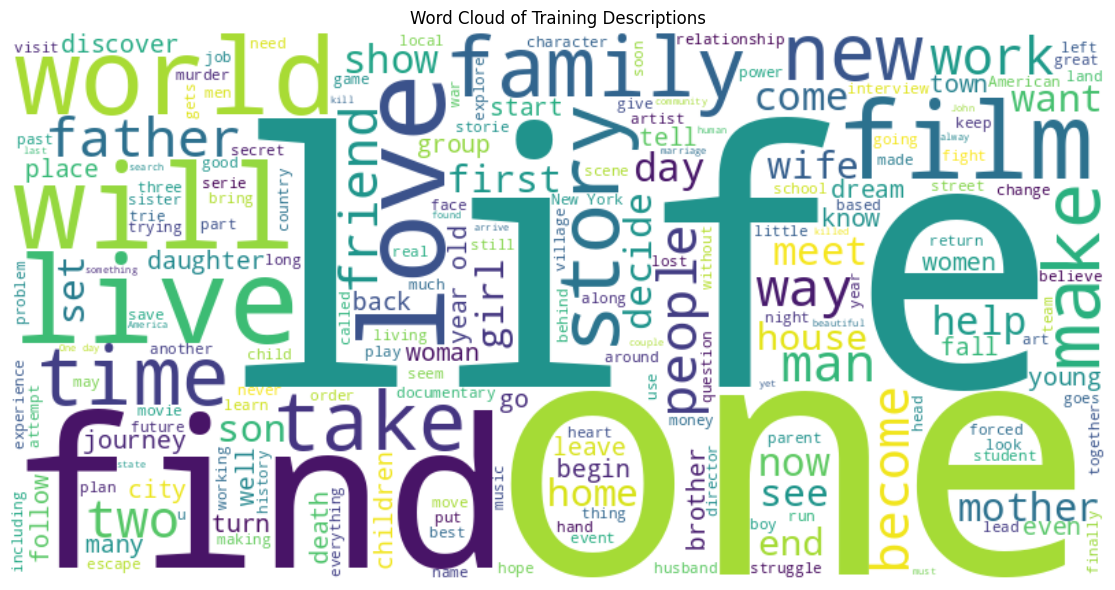

In [12]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Training Descriptions")
plt.tight_layout()
plt.show()


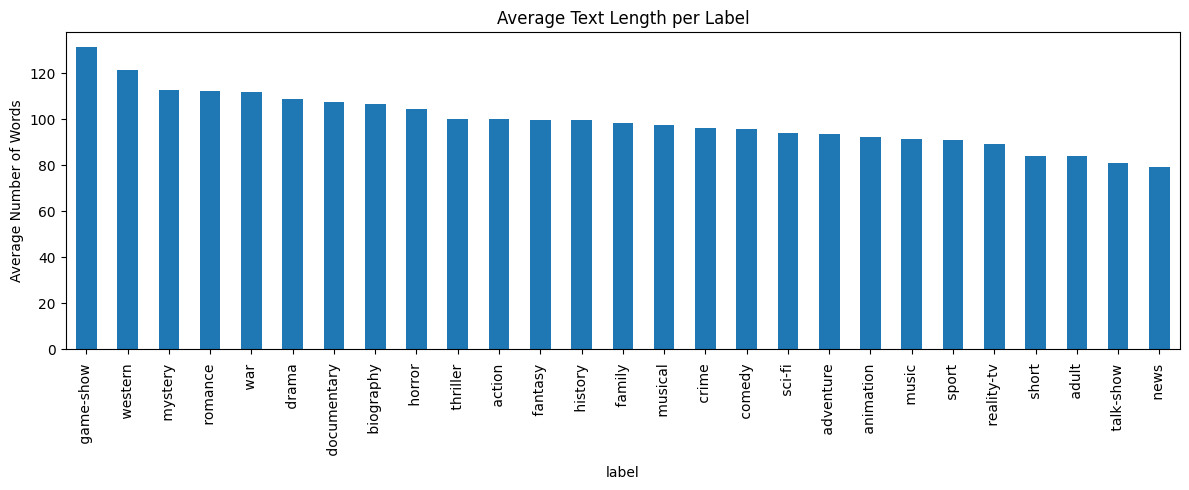

In [13]:
df = pd.DataFrame({
    'label': train_label,
    'text': train_description
})
df['length'] = df['text'].apply(lambda x: len(x.split()))

avg_len = df.groupby('label')['length'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
avg_len.plot(kind='bar')
plt.ylabel("Average Number of Words")
plt.title("Average Text Length per Label")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer=TfidfVectorizer(max_features=5000)
le=LabelEncoder()

x_train=vectorizer.fit_transform(train_description)
y_train=le.fit_transform(train_label)

x_test=vectorizer.transform(test_description)
y_test=le.transform(test_label)

In [ ]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.4446678966789668

Classification Report:

               precision    recall  f1-score   support

      action        0.33      0.45      0.38      1314
       adult        0.29      0.65      0.40       590
   adventure        0.20      0.31      0.24       775
   animation        0.16      0.29      0.21       498
   biography        0.04      0.25      0.07       264
      comedy        0.63      0.41      0.50      7446
       crime        0.12      0.37      0.18       505
 documentary        0.81      0.54      0.65     13096
       drama        0.72      0.35      0.47     13612
      family        0.14      0.31      0.19       783
     fantasy        0.11      0.31      0.16       322
   game-show        0.56      0.72      0.63       193
     history        0.06      0.29      0.10       243
      horror        0.55      0.62      0.58      2204
       music        0.38      0.70      0.49       731
     musical        0.11      0.31      0.17       276
     myste